In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [2]:
from dgs.utils import load_results_from_files
from dgs.plotutils import plot_coded_column as _plot_coded_column
from dgs.utils import count_unique_values, print_groupby

kw_plot = {'scaleToMax': False}
def plot_coded_column(df, name, label=None):
    _plot_coded_column(df, name, label=label, **kw_plot)

## Goals
- Identify degree of adaptivity: raw numbers/types of self-governance mechanisms and parameters, and what kinds of "degrees of freedom" they afford
- Identify degree of autonomy: ability to self-govern (System 5 of Viable System Model)

## Import data and check what's generally in it

In [3]:
dir = 'tmp'

df_objects, df_params = load_results_from_files(dir)

In [4]:
df_objects.head()

,object_name,contract,type,inheritance,modifiers,values,visibility,description,parameters,title,...,coding_keyword_search,coding_topic_search,url,project,repo_update_datetime,repo_version,repo_url,parameters_names,proposal,voting
id,,,,,,,,,,,,,,,,,,,,,
Comp.Approval@61,Approval,Comp,EventDefinition,[],[],[],NaN,The standard EIP-20 approval event,"[Comp.Approval.owner@61, Comp.Approval.spender...",NaN,...,[],[],https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main,2022-01-11T02:42:53Z,NaN,https://github.com/notchia/metagov,"[owner, spender, amount]",0,0
Comp.Checkpoint@31,Checkpoint,Comp,StructDefinition,[],[],[],NaN,A checkpoint for marking number of votes from ...,"[Comp.Checkpoint.fromBlock@32, Comp.Checkpoint...",NaN,...,[voting],[],https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main,2022-01-11T02:42:53Z,NaN,https://github.com/notchia/metagov,"[fromBlock, votes]",0,1
Comp.Comp@8,Comp,Comp,ContractDefinition,[],[],[],NaN,NaN,"[Comp.Comp.name@10, Comp.Comp.symbol@13, Comp....",NaN,...,[voting],[],https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main,2022-01-11T02:42:53Z,NaN,https://github.com/notchia/metagov,"[name, symbol, decimals, totalSupply, allowanc...",0,1
Comp.DelegateChanged@52,DelegateChanged,Comp,EventDefinition,[],[],[],NaN,An event thats emitted when an account changes...,"[Comp.DelegateChanged.delegator@52, Comp.Deleg...",NaN,...,[],[],https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main,2022-01-11T02:42:53Z,NaN,https://github.com/notchia/metagov,"[delegator, fromDelegate, toDelegate]",0,0
Comp.DelegateVotesChanged@55,DelegateVotesChanged,Comp,EventDefinition,[],[],[],NaN,An event thats emitted when a delegate account...,"[Comp.DelegateVotesChanged.delegate@55, Comp.D...",NaN,...,[voting],"[change, delegate]",https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main,2022-01-11T02:42:53Z,NaN,https://github.com/notchia/metagov,"[delegate, previousBalance, newBalance]",0,1


In [5]:
print(df_objects.columns)
print(len(df_objects))

Index(['object_name', 'contract', 'type', 'inheritance', 'modifiers', 'values',
       'visibility', 'description', 'parameters', 'title', 'notice', 'dev',
       'param', 'return', 'full_comment', 'coding_keyword_search',
       'coding_topic_search', 'url', 'project', 'repo_update_datetime',
       'repo_version', 'repo_url', 'parameters_names', 'proposal', 'voting'],
      dtype='object')
157


In [6]:
keyword_counts = count_unique_values(df_objects['coding_keyword_search'])#['coding_keyword_search'])
print(keyword_counts)
KEYWORDS = sorted(list(keyword_counts.index))
print(KEYWORDS)

proposal    53
voting      38
Name: count, dtype: int64
['proposal', 'voting']


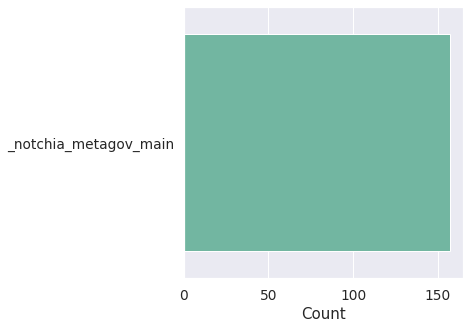

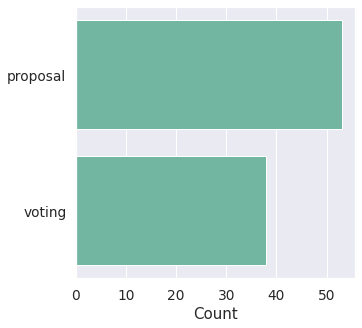

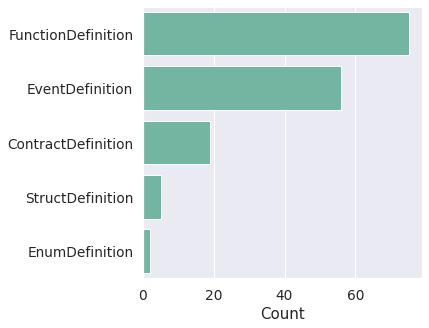

In [7]:
plot_coded_column(df_objects, 'project')
plot_coded_column(df_objects, 'coding_keyword_search')
plot_coded_column(df_objects, 'type')

In [8]:
print(f"Including data from {len(df_objects['project'].unique())} projects")
print(f"Found {len(df_objects.index)} keyword-coded contract objects and {len(df_params.index)} parameters")
print(f"Keywords include: {', '.join(KEYWORDS)}")

Including data from 1 projects
Found 157 keyword-coded contract objects and 347 parameters
Keywords include: proposal, voting


In [9]:
df_params.head()

,parameter_name,object_id,contract,type,type_category,initial_value,visibility,description,full_comment,url,project
id,,,,,,,,,,,
GovernorBravoDelegator.constructor.timelock_@8,timelock_,GovernorBravoDelegator.constructor@7,GovernorBravoDelegator,address,address,NaN,NaN,NaN,NaN,https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main
GovernorBravoDelegator.constructor.comp_@9,comp_,GovernorBravoDelegator.constructor@7,GovernorBravoDelegator,address,address,NaN,NaN,NaN,NaN,https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main
GovernorBravoDelegator.constructor.admin_@10,admin_,GovernorBravoDelegator.constructor@7,GovernorBravoDelegator,address,address,NaN,NaN,NaN,NaN,https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main
GovernorBravoDelegator.constructor.implementation_@11,implementation_,GovernorBravoDelegator.constructor@7,GovernorBravoDelegator,address,address,NaN,NaN,NaN,NaN,https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main
GovernorBravoDelegator.constructor.votingPeriod_@12,votingPeriod_,GovernorBravoDelegator.constructor@7,GovernorBravoDelegator,uint,uint,NaN,NaN,NaN,NaN,https://github.com/notchia/metagov/blob/main/d...,_notchia_metagov_main


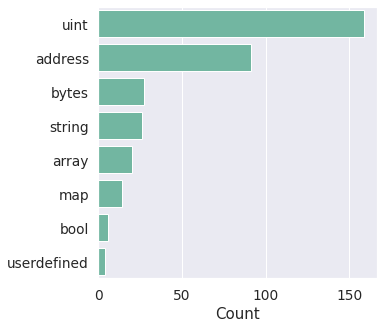

In [10]:
#plot_coded_column(df_params, 'project')
#plot_coded_column(df_params, 'coding_keyword_search_from_object')
plot_coded_column(df_params, 'type_category')

## By object type

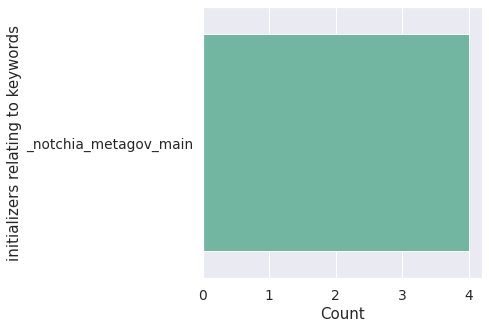

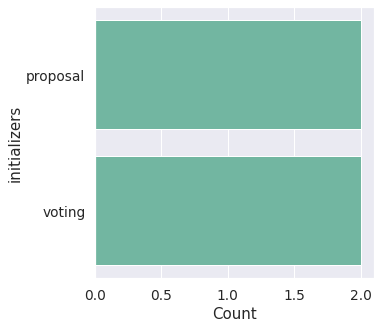

In [11]:
df_init = df_objects[df_objects['object_name'].isin(['constructor', 'initialize'])]
plot_coded_column(df_init, 'project', label='initializers relating to keywords')
plot_coded_column(df_init, 'coding_keyword_search', label='initializers')

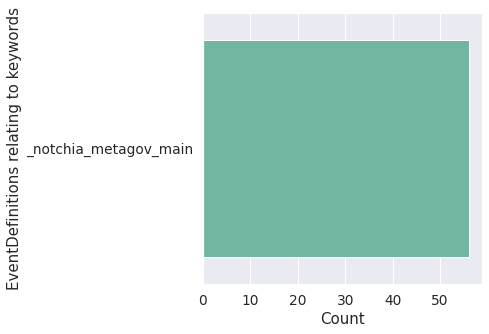

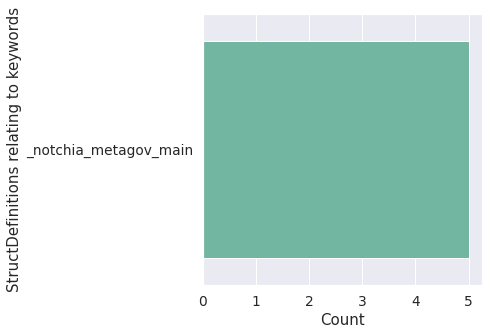

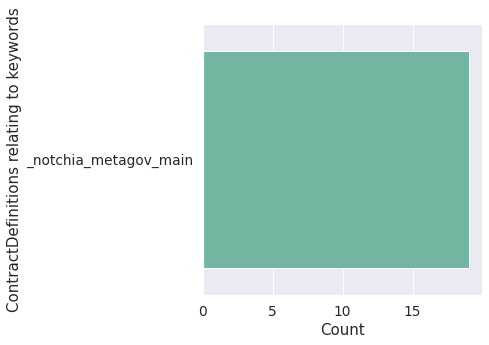

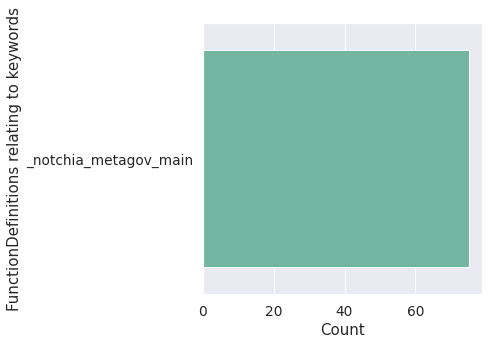

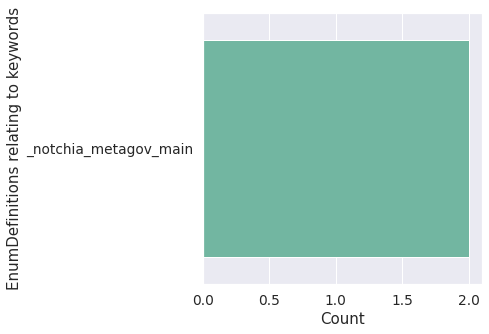

In [12]:
dfs_by_type = {
    t: df_objects[df_objects['type'] == t] for t in df_objects.type.unique()
}

for t, df in dfs_by_type.items():
    plot_coded_column(df, 'project', label=f'{t}s relating to keywords')


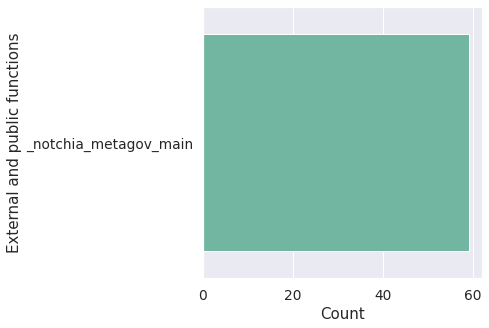

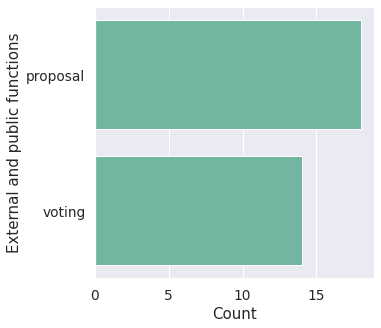

In [13]:
df_functions = dfs_by_type['FunctionDefinition']
df_ext_funcs = df_functions[df_functions['visibility'].isin(['external', 'public'])]
plot_coded_column(df_ext_funcs, 'project', label='External and public functions')
plot_coded_column(df_ext_funcs, 'coding_keyword_search', label='External and public functions')

In [14]:
# Configurable parameters at initialization of governance smart contracts
df_init.sort_values(by='project', inplace=True)
for i, row in df_init.iterrows():
    params = row['parameters']
    print(f"{row['project']}, {row['contract']}:")
    if isinstance(params, list):
        parameterNames = [df_params.loc[ref, 'parameter_name'] for ref in params]
        print("\t" + "\n\t".join(parameterNames) + "\n")
    else:
        print("\tNone\n")

_notchia_metagov_main, Comp:
	account

_notchia_metagov_main, GovernorBravoDelegate:
	timelock_
	comp_
	votingPeriod_
	votingDelay_
	proposalThreshold_

_notchia_metagov_main, GovernorBravoDelegator:
	timelock_
	comp_
	admin_
	implementation_
	votingPeriod_
	votingDelay_
	proposalThreshold_

_notchia_metagov_main, Timelock:
	admin_
	delay_



/tmp/ipykernel_391484/37247637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_init.sort_values(by='project', inplace=True)


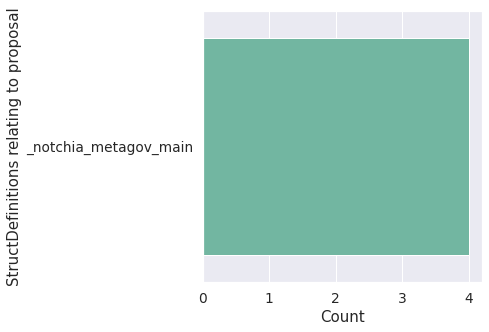

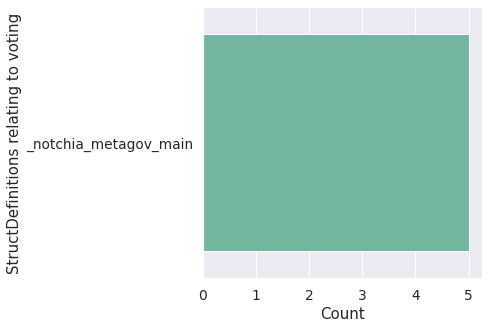

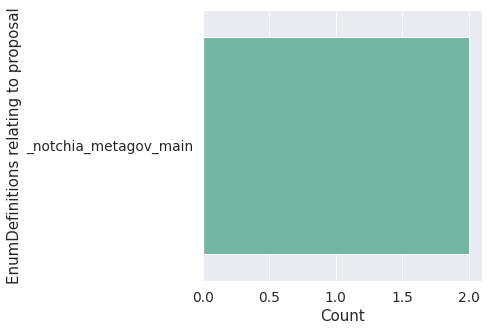

<Figure size 360x360 with 0 Axes>

In [15]:
for t, df in dfs_by_type.items():
    if t in ['StructDefinition', 'EnumDefinition']:
        for kw in KEYWORDS:
            try:
                plot_coded_column(df[df[kw] == 1], 'project', label=f'{t}s relating to {kw}')
            except ValueError:
                pass # None found

In [16]:
# How many parameters does it take to define an individual proposal? (Or in some cases, the proposal generation process overall?)
df_tmp = dfs_by_type['StructDefinition']
for kw in ['proposal']:
    try:
        df_kw = df_tmp[df_tmp[kw] == 1]
        df_kw['parameter_count'] = df_kw['parameters'].apply(len)
        gb_kw = df_kw[['project', 'contract', 'object_name', 'parameter_count']].groupby(by='project')
        print_groupby(gb_kw)
    except ValueError:
        pass # None found

_notchia_metagov_main
                                                          project  \
id                                                                  
GovernorBravoDelegateStorageV1.Proposal@93  _notchia_metagov_main   
GovernorBravoDelegateStorageV1.Proposal@99  _notchia_metagov_main   
GovernorBravoDelegateStorageV1.Receipt@141  _notchia_metagov_main   
GovernorBravoDelegateStorageV1.Receipt@147  _notchia_metagov_main   

                                                                  contract  \
id                                                                           
GovernorBravoDelegateStorageV1.Proposal@93  GovernorBravoDelegateStorageV1   
GovernorBravoDelegateStorageV1.Proposal@99  GovernorBravoDelegateStorageV1   
GovernorBravoDelegateStorageV1.Receipt@141  GovernorBravoDelegateStorageV1   
GovernorBravoDelegateStorageV1.Receipt@147  GovernorBravoDelegateStorageV1   

                                           object_name  parameter_count  
id                  

/tmp/ipykernel_391484/3355254069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kw['parameter_count'] = df_kw['parameters'].apply(len)


In [17]:
# How many states can a proposal be in?
df_tmp = dfs_by_type['EnumDefinition']
for kw in ['proposal']:
    try:
        df_kw = df_tmp[df_tmp[kw] == 1]
        df_kw['parameter_count'] = df_kw['values'].apply(len)
        gb_kw = df_kw[['project', 'contract', 'object_name', 'parameter_count']].groupby(by='project')
        print_groupby(gb_kw)
    except ValueError:
        pass # None found

_notchia_metagov_main
                                                                project  \
id                                                                        
GovernorBravoDelegateStorageV1.ProposalState@153  _notchia_metagov_main   
GovernorBravoDelegateStorageV1.ProposalState@159  _notchia_metagov_main   

                                                                        contract  \
id                                                                                 
GovernorBravoDelegateStorageV1.ProposalState@153  GovernorBravoDelegateStorageV1   
GovernorBravoDelegateStorageV1.ProposalState@159  GovernorBravoDelegateStorageV1   

                                                    object_name  \
id                                                                
GovernorBravoDelegateStorageV1.ProposalState@153  ProposalState   
GovernorBravoDelegateStorageV1.ProposalState@159  ProposalState   

                                                  parameter_count  
id 

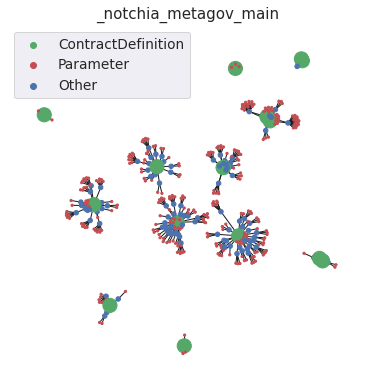

In [18]:
import networkx as nx

# TODO: show only functions, or or at least not modifiers or events
# TODO: figure out why some contracts don't show up as such
# TODO: add directional inheritance relationships

for project in df_objects['project'].unique():
    # Define the nodes
    df_o = df_objects[df_objects['project'] == project][['object_name', 'contract', 'type', 'visibility', 'inheritance', 'coding_keyword_search']].rename(columns={'object_name': 'name'})
    df_p = df_params[df_params['project'] == project][['parameter_name', 'object_id']].rename(columns={'parameter_name': 'name'})

    # Define the edges
    df_c = df_o[df_o['type'] != 'ContractDefinition']['contract'].reset_index().set_index('contract').rename(columns={'id': 'from'})
    df_c = df_c.join(df_o[df_o['type'] == 'ContractDefinition'].reset_index().set_index('contract')).rename(columns={'id': 'to'})
    df_edges = df_p['object_id'].reset_index().rename(columns={'object_id': 'from', 'id': 'to'})
    df_edges = pd.concat([df_edges, df_c])

    G = nx.from_pandas_edgelist(df_edges, source='from', target='to')
    
    # Label the node attributes
    df_nodes = pd.concat([df_o, df_p])
    df_nodes['type'] = df_nodes['type'].apply(lambda x: x if not pd.isna(x) else 'Parameter')
    nx.set_node_attributes(G, pd.Series(df_nodes.name).to_dict(), 'name')
    nx.set_node_attributes(G, pd.Series(df_nodes.type).to_dict(), 'type')

    # Set node formats based on attributes
    color_dict = {'ContractDefinition': 'g', 'Parameter': 'r', 'Other': 'b'}
    size_dict = {'ContractDefinition': 200, 'Parameter': 5, 'Other': 20}
    colors = [color_dict.get(x[1], color_dict['Other']) for x in G.nodes.data('type')]
    sizes = [size_dict.get(x[1], size_dict['Other']) for x in G.nodes.data('type')]
    
    # Draw
    plt.figure()
    nx.draw(G, node_color=colors, node_size=sizes)
    ax = plt.gca()
    ax.set_title(project)

    # A hack to get color labels to show up
    for k, v in color_dict.items():
        plt.scatter([],[], c=v, label=k)
    plt.legend()
    
    